In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from TrajectoryClusteringAnalysis import TCA



## Preprocessing data

In [12]:

df = pd.read_csv('../data/dataframe_test.csv')
df.head()

,id,month,care_status,sex,age,education,wealth,distance_clinic
0,3,0.0,D,1.0,1.0,2.0,2.0,1.0
1,3,1.0,D,1.0,1.0,2.0,2.0,1.0
2,3,2.0,D,1.0,1.0,2.0,2.0,1.0
3,3,3.0,D,1.0,1.0,2.0,2.0,1.0
4,3,4.0,D,1.0,1.0,2.0,2.0,1.0


In [16]:
# Sélectionner les colonnes pertinentes pour l'analyse
selected_cols = df[['id', 'month', 'care_status']]
# Créer un tableau croisé des données en format large
#       -> Chaque individu est sur une ligne.
#       -> Les mesures dans le temps (Temps1, Temps2, Temps3) sont des colonnes distinctes.
pivoted_data = selected_cols.pivot(index='id', columns='month', values='care_status')
pivoted_data['id'] = pivoted_data.index
pivoted_data = pivoted_data[['id'] + [col for col in pivoted_data.columns if col != 'id']]
# Renommer les colonnes avec un préfixe "month_"
pivoted_data.columns = ['id'] + ['month_' + str(int(col)+1) for col in pivoted_data.columns[1:]]
# Sélectionner un échantillon aléatoire de 10% des données
pivoted_data_random_sample = pivoted_data.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [28]:
# Filter individuals observed for at least 18 months
valid_18months_individuals = pivoted_data.dropna(thresh=19).reset_index(drop=True)
# Select only the first 18 months for analysis
valid_18months_individuals = valid_18months_individuals[['id'] + [f'month_{i}' for i in range(1, 19)]]
# Sélectionner un échantillon aléatoire de 10% des données
valid_18months_individuals_sample = valid_18months_individuals.sample(frac=0.1, random_state=42).reset_index(drop=True)

## Initialisation du Package

In [29]:
tca = TCA.TCA(data=valid_18months_individuals_sample,
              id='id',
              alphabet=['D', 'C', 'T', 'S'],
              states=["diagnostiqué", "en soins", "sous traitement", "inf. contrôlée"])

INFO:root:TCA object initialized successfully


Dataset :
data shape:  (137, 19)
state coding:
   alphabet            label  label encoded
0        D     diagnostiqué              1
1        C         en soins              2
2        T  sous traitement              3
3        S   inf. contrôlée              4


## Distance Hamming

In [30]:
distance_matrix = tca.compute_distance_matrix(metric='hamming', substitution_cost_matrix=None)
print("distance matrix :\n",distance_matrix)

INFO:root:Calculating distance matrix using metric: hamming...
c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\TCA.py:188: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

INFO:root:Time taken for computation: 0.01 seconds


distance matrix :
 [0.63157895 0.94736842 0.94736842 ... 0.94736842 0.57894737 0.52631579]


INFO:root:Computing the linkage matrix using method: ward...
c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\TCA.py:283: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

INFO:root:Linkage matrix computed successfully


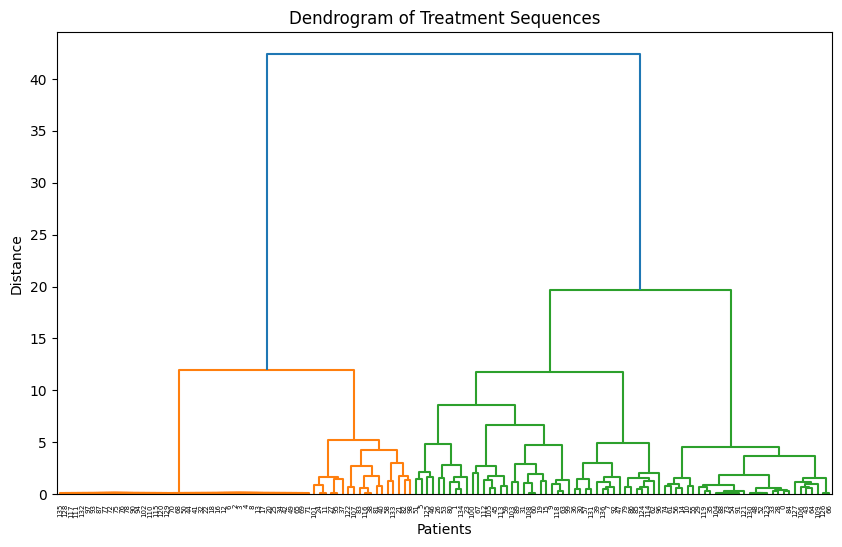

In [31]:
linkage_matrix = tca.hierarchical_clustering(distance_matrix)
tca.plot_dendrogram(linkage_matrix)

### plot heatmap with distance hamming

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\TCA.py:412: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<Figure size 800x800 with 0 Axes>

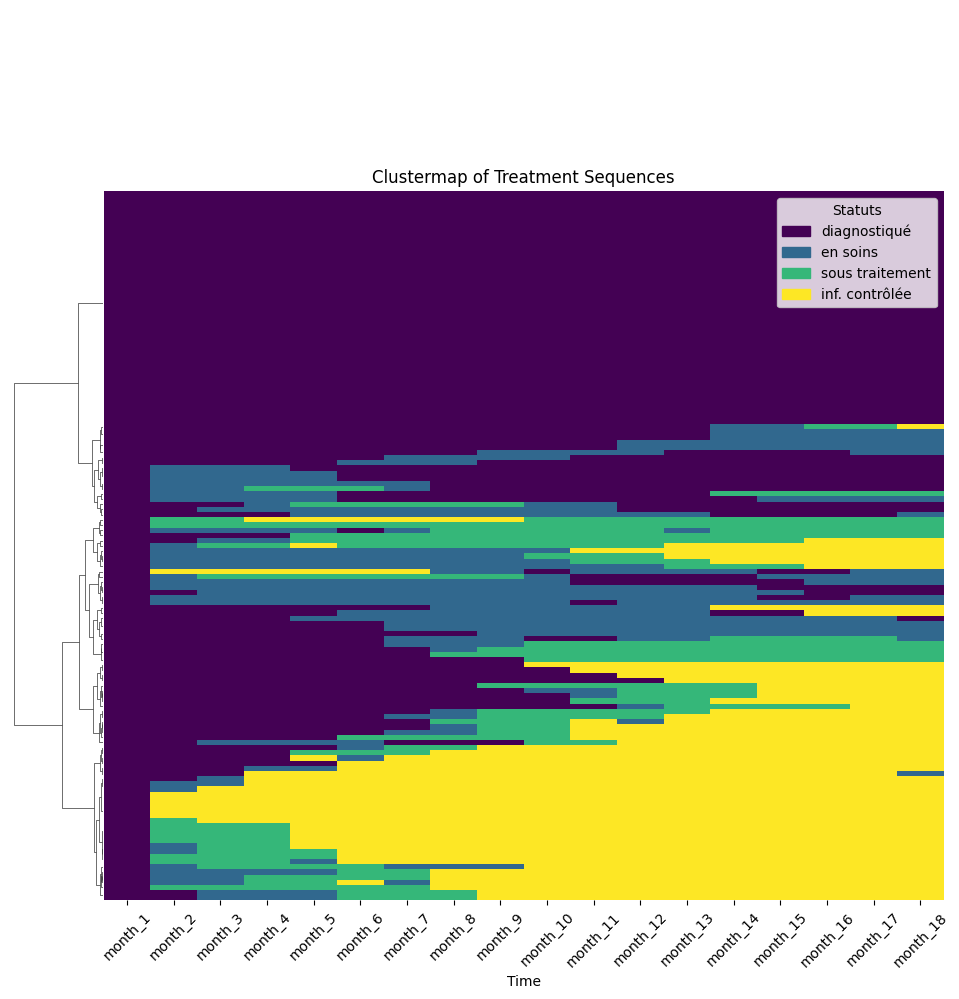

In [32]:
tca.plot_clustermap(linkage_matrix)

heights:  [9.0, 3.6, 8.8, 6.0]


c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\TCA.py:505: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\TCA.py:505: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

c:\Users\ndiaga.dieng\Documents\TrajectoryClusteringAnalysis\venv\lib\site-packages\TrajectoryClusteringAnalysis\TCA.py:505: FutureWarning:

Downcasting behavior in `replace` is deprecated and w

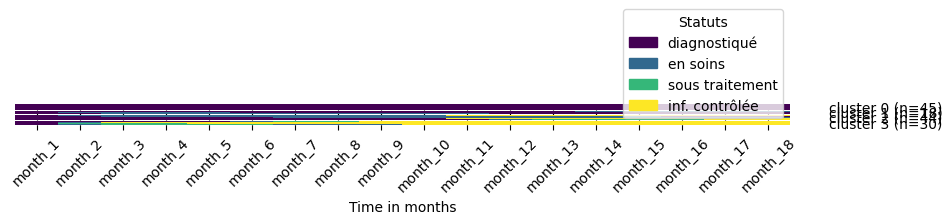

In [33]:
clusters = tca.assign_clusters(linkage_matrix, num_clusters=4)
    
tca.plot_cluster_heatmaps(clusters, sorted=False)

In [41]:
import pandas as pd
import numpy as np

# Données d'entrée
trajectories = [
    ["Chirurgie", "Chimiothérapie", "Radiothérapie"],
    ["Chimiothérapie", "Radiothérapie"],
    ["Chirurgie", "Radiothérapie"]
]

# Création du DataFrame
max_length = max(len(traj) for traj in trajectories)
columns = ['T' + str(i+1) for i in range(max_length)]

df = pd.DataFrame(
    [traj + [np.nan]*(max_length - len(traj)) for traj in trajectories],
    columns=columns
)

# Ajout de la colonne id
df.insert(0, 'id', range(1, len(df) + 1))
df

,id,T1,T2,T3
0,1,Chirurgie,Chimiothérapie,Radiothérapie
1,2,Chimiothérapie,Radiothérapie,NaN
2,3,Chirurgie,Radiothérapie,NaN


In [42]:
tca = TCA.TCA(data=df,
              id='id',
              alphabet=["Chirurgie", "Chimiothérapie", "Radiothérapie"],
              states=["Chirurgie", "Chimiothérapie", "Radiothérapie"])

INFO:root:TCA object initialized successfully


Dataset :
data shape:  (3, 4)
state coding:
          alphabet           label  label encoded
0       Chirurgie       Chirurgie              1
1  Chimiothérapie  Chimiothérapie              2
2   Radiothérapie   Radiothérapie              3
